In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import os 

%matplotlib inline
%load_ext tensorboard

Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the ELU activation function.

In [2]:
DNN = tf.keras.Sequential()
DNN.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    DNN.add(keras.layers.Dense(100,
        activation="elu",
        kernel_initializer="he_normal"))
DNN.add(keras.layers.Dense(10, activation="softmax"))

Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.

In [3]:
opt = keras.optimizers.Nadam(lr=5e-5)

In [4]:
DNN.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [6]:
(xtrain_full, ytrain_full), (xtest, ytest) = keras.datasets.cifar10.load_data()

In [7]:
xtrain = xtrain_full[5000:]
ytrain = ytrain_full[5000:]
xval = xtrain_full[:5000]
yval = ytrain_full[:5000]

In [7]:
early_stopping_callback = keras.callbacks.EarlyStopping(patience=20)
best_model_callback = keras.callbacks.ModelCheckpoint("DNN_cifar10.h5", save_best_only=True)

In [8]:
runs = 1
logdir = os.path.join(os.curdir, "cifar10_logs", "runs_{:03d}".format(runs))
tensorboard_callbacks = keras.callbacks.TensorBoard(logdir)
callbacks = [early_stopping_callback, best_model_callback, tensorboard_callbacks]

In [10]:
DNN.fit(xtrain, ytrain, epochs=300, validation_data=(xval, yval), callbacks=callbacks)

Epoch 1/300
   1/1407 [..............................] - ETA: 0s - loss: 347.7799 - accuracy: 0.0625WARNING:tensorflow:From C:\Users\nated\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 11s 8ms/step - loss: 5.2551 - accuracy: 0.1636 - val_loss: 2.2026 - val_accuracy: 0.2070
Epoch 2/300
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0926 - accuracy: 0.2300 - val_loss: 2.0977 - val_accuracy: 0.2292
Epoch 3/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9786 - accuracy: 0.2680 - val_loss: 2.0423 - val_accuracy: 0.2708
Epoch 4/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9011 - accuracy: 0.2949 - val_loss: 1.9620 - val_accuracy: 0.2894
Epoch 5/300
1407/

In [11]:
best_DNN = tf.keras.models.load_model("DNN_cifar10.h5")
best_DNN.evaluate(xval, yval)

157/157 [==============================] - 0s 3ms/step - loss: 1.5238 - accuracy: 0.1164


[1.5237600803375244, 0.11640000343322754]

In [12]:
DNN.evaluate(xval, yval)

157/157 [==============================] - 0s 3ms/step - loss: 1.5771 - accuracy: 0.4556


[1.5771427154541016, 0.45559999346733093]

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [15]:
BN = keras.models.Sequential()
BN.add(keras.layers.Flatten(input_shape=[32,32,3]))
BN.add(keras.layers.BatchNormalization())
for _ in range(20):
    BN.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    BN.add(keras.layers.BatchNormalization())
    BN.add(keras.layers.Activation("elu"))
BN.add(keras.layers.Dense(10, activation="softmax"))

BN.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

runs_bn = 1
logdir = os.path.join(os.curdir, "cifar10_logs", "runs_bn_{:03d}".format(runs))
tensorboard_callbacks = keras.callbacks.TensorBoard(logdir)

best_bn_callback = keras.callbacks.ModelCheckpoint("BN_cifar10.h5", save_best_only=True)
bn_callbacks = [early_stopping_callback, best_bn_callback, tensorboard_callbacks]

In [16]:
BN.fit(xtrain, ytrain, epochs=200, validation_data=(xval, yval), callbacks=bn_callbacks)

Epoch 1/200
1407/1407 [==============================] - 33s 23ms/step - loss: 1.9038 - accuracy: 0.3204 - val_loss: 1.6877 - val_accuracy: 0.3916
Epoch 2/200
1407/1407 [==============================] - 33s 23ms/step - loss: 1.7254 - accuracy: 0.3835 - val_loss: 1.5997 - val_accuracy: 0.4258
Epoch 3/200
1407/1407 [==============================] - 36s 26ms/step - loss: 1.6545 - accuracy: 0.4110 - val_loss: 1.5518 - val_accuracy: 0.4466
Epoch 4/200
1407/1407 [==============================] - 34s 24ms/step - loss: 1.6054 - accuracy: 0.4270 - val_loss: 1.5277 - val_accuracy: 0.4580
Epoch 5/200
1407/1407 [==============================] - 36s 25ms/step - loss: 1.5717 - accuracy: 0.4432 - val_loss: 1.4982 - val_accuracy: 0.4606
Epoch 6/200
1407/1407 [==============================] - 31s 22ms/step - loss: 1.5413 - accuracy: 0.4507 - val_loss: 1.4793 - val_accuracy: 0.4768
Epoch 7/200
1407/1407 [==============================] - 29s 21ms/step - loss: 1.5161 - accuracy: 0.4617 - val_loss: 1

In [17]:
best_BN = keras.models.load_model("BN_cifar10.h5")
best_BN.evaluate(xval, yval)

157/157 [==============================] - 1s 4ms/step - loss: 1.3543 - accuracy: 0.1040


[1.3542672395706177, 0.10400000214576721]

In [19]:
learning_rates = [1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3, 3e-3]
#opt = keras.optimizers.Nadam(lr=5e-5)

In [27]:
for idx, lrate in enumerate(learning_rates):
    BN = keras.models.Sequential()
    BN.add(keras.layers.Flatten(input_shape=[32,32,3]))
    BN.add(keras.layers.BatchNormalization())
    for _ in range(20):
        BN.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
        BN.add(keras.layers.BatchNormalization())
        BN.add(keras.layers.Activation("elu"))
    BN.add(keras.layers.Dense(10, activation="softmax"))

    opt = keras.optimizers.Nadam(lr=lrate)
    BN.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    early_stopping_callback = keras.callbacks.EarlyStopping(patience=15)
    logdir = os.path.join(os.curdir, "cifar10_logs", "lr_runs_bn_{:03d}".format(idx))
    tensorboard_callbacks = keras.callbacks.TensorBoard(logdir)
    best_bn_callback = keras.callbacks.ModelCheckpoint("BN_cifar10{}".format(lrate), save_best_only=True, save_weights_only=True)  
    bn_callbacks = [early_stopping_callback, best_bn_callback, tensorboard_callbacks]

    BN.fit(xtrain, ytrain, epochs=200, validation_data=(xval, yval), callbacks=bn_callbacks)
    BN.load_weights("BN_cifar10{}".format(lrate))

    cur_loss, cur_acc = BN.evaluate(xval, yval)
    print("learning Rate = {}".format(lrate))
    print(best_BN.evaluate(xval, yval))
    if idx == 0:
        BN.save("Best_BN_Model")
    else:
        cur_best_model = keras.models.load_model("Best_BN_Model")
        best_loss, best_acc = cur_best_model.evaluate(xval, yval)
        if cur_acc > best_acc:
            BN.save("Best_BN_Model")

l_accuracy: 0.4768
Epoch 26/200
1407/1407 [==============================] - 35s 25ms/step - loss: 1.4919 - accuracy: 0.4691 - val_loss: 1.4603 - val_accuracy: 0.4734
Epoch 27/200
1407/1407 [==============================] - 36s 25ms/step - loss: 1.4820 - accuracy: 0.4739 - val_loss: 1.4571 - val_accuracy: 0.4750
Epoch 28/200
1407/1407 [==============================] - 36s 26ms/step - loss: 1.4767 - accuracy: 0.4757 - val_loss: 1.4559 - val_accuracy: 0.4748
Epoch 29/200
1407/1407 [==============================] - 35s 25ms/step - loss: 1.4715 - accuracy: 0.4766 - val_loss: 1.4462 - val_accuracy: 0.4826
Epoch 30/200
1407/1407 [==============================] - 36s 25ms/step - loss: 1.4682 - accuracy: 0.4789 - val_loss: 1.4455 - val_accuracy: 0.4798
Epoch 31/200
1407/1407 [==============================] - 35s 25ms/step - loss: 1.4611 - accuracy: 0.4806 - val_loss: 1.4443 - val_accuracy: 0.4798
Epoch 32/200
1407/1407 [==============================] - 36s 25ms/step - loss: 1.4493 - accu

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [31]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu", save_best_only=True, save_weights_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = xtrain.mean(axis=0)
X_stds = xtrain.std(axis=0)
X_train_scaled = (xtrain - X_means) / X_stds
X_valid_scaled = (xval - X_means) / X_stds
X_test_scaled = (xtest - X_means) / X_stds

model.fit(X_train_scaled, ytrain, epochs=100, validation_data=(X_valid_scaled, yval), callbacks=callbacks)

model.load_weights("my_cifar10_selu")
model.save("my_cifar10_selu_model")
model.evaluate(X_valid_scaled, yval)

Epoch 1/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.9216 - accuracy: 0.3112 - val_loss: 1.8650 - val_accuracy: 0.3342
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7046 - accuracy: 0.3954 - val_loss: 1.6848 - val_accuracy: 0.3994
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6047 - accuracy: 0.4352 - val_loss: 1.6472 - val_accuracy: 0.4146
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5402 - accuracy: 0.4593 - val_loss: 1.5652 - val_accuracy: 0.4416
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4841 - accuracy: 0.4802 - val_loss: 1.5770 - val_accuracy: 0.4542
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4358 - accuracy: 0.5011 - val_loss: 1.5328 - val_accuracy: 0.4584
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3963 - accuracy: 0.5136 - val_loss: 1.5742 

[1.47893226146698, 0.5013999938964844]

Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [34]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout", save_best_only=True, save_weights_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = xtrain.mean(axis=0)
X_stds = xtrain.std(axis=0)
X_train_scaled = (xtrain - X_means) / X_stds
X_valid_scaled = (xval - X_means) / X_stds
X_test_scaled = (xtest - X_means) / X_stds

model.fit(X_train_scaled, ytrain, epochs=100, validation_data=(X_valid_scaled, yval), callbacks=callbacks)

model.load_weights("my_cifar10_alpha_dropout")
model.save("my_cifar10_alpha_dropout_model")
model.evaluate(X_valid_scaled, yval)

Epoch 1/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8967 - accuracy: 0.3262 - val_loss: 1.7230 - val_accuracy: 0.3956
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6589 - accuracy: 0.4116 - val_loss: 1.6811 - val_accuracy: 0.4170
Epoch 3/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5698 - accuracy: 0.4474 - val_loss: 1.5783 - val_accuracy: 0.4504
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4981 - accuracy: 0.4717 - val_loss: 1.6470 - val_accuracy: 0.4444
Epoch 5/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4470 - accuracy: 0.4922 - val_loss: 1.5287 - val_accuracy: 0.4756
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4002 - accuracy: 0.5089 - val_loss: 1.5374 - val_accuracy: 0.4766
Epoch 7/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3544 - accuracy: 0.5261 - val_loss: 1.6166 

[1.5239230394363403, 0.49219998717308044]

In [35]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [36]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [37]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [38]:
keras.backend.clear_session()

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == yval[:, 0])
accuracy

0.491

# 1Cycle Scheduling LR
Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [39]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

352/352 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1396


[1e-05, 9.999868, 2.567208766937256, 3.7718941484178816]

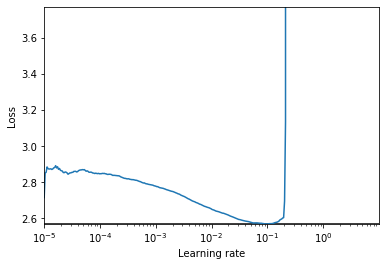

In [12]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, ytrain, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [15]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-2, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [16]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [17]:
n_epochs = 20
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, ytrain, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, yval),
                    callbacks=[onecycle])

Epoch 1/20
352/352 [==============================] - 2s 6ms/step - loss: 1.8719 - accuracy: 0.3362 - val_loss: 1.7554 - val_accuracy: 0.3576
Epoch 2/20
352/352 [==============================] - 2s 6ms/step - loss: 1.6399 - accuracy: 0.4161 - val_loss: 1.6604 - val_accuracy: 0.4094
Epoch 3/20
352/352 [==============================] - 2s 6ms/step - loss: 1.5775 - accuracy: 0.4443 - val_loss: 1.5959 - val_accuracy: 0.4464
Epoch 4/20
352/352 [==============================] - 2s 6ms/step - loss: 1.5394 - accuracy: 0.4600 - val_loss: 1.7017 - val_accuracy: 0.4466
Epoch 5/20
352/352 [==============================] - 2s 6ms/step - loss: 1.5147 - accuracy: 0.4694 - val_loss: 1.5615 - val_accuracy: 0.4664
Epoch 6/20
352/352 [==============================] - 2s 6ms/step - loss: 1.4949 - accuracy: 0.4816 - val_loss: 1.6387 - val_accuracy: 0.4518
Epoch 7/20
352/352 [==============================] - 2s 6ms/step - loss: 1.4917 - accuracy: 0.4861 - val_loss: 1.6420 - val_accuracy: 0.4302
Epoch 

In [19]:
model.evaluate(X_valid_scaled, yval)

157/157 [==============================] - 0s 2ms/step - loss: 1.6642 - accuracy: 0.5394


[1.6642210483551025, 0.5393999814987183]